In [1]:
import pandas as pd 
import numpy as np
from scipy import interpolate
import matplotlib.pyplot as plt
import math


This is a relative nice function that is widely known and used, right? So we should be able to interpolate it with polynomials. For every task try to estimate the error of the interpolation with the $\infty$ or Chebyschev norm:

$$ \| g \|_\infty = \underset{t \in [-1, 1]}{ \max} g(t). $$  

First suppose we have equally spaced point in the interval $[-1, 1]$:
$$ x_j = -1 + \frac{2j}{n}, \;\;\; j = 0, 1, ..., n. $$

For $n = 2, 5, 8, 14$ find the interpolating polynomial (using Python + your desired built in functions) and plot these interpolations.

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3251: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3251: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3251: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3251: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


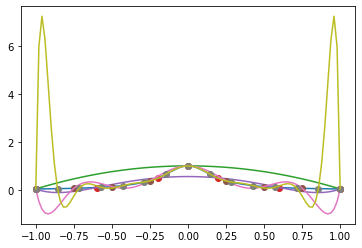

In [2]:
x_fine = np.linspace(-1,1,num =100)

def rungeFun(x):
    return 1/(1 + 25* x ** 2)

ns = [3, 6, 9, 15]

plt.plot(x_fine, rungeFun(x_fine))

for n in ns:
    x1 = np.linspace(-1, 1, num = n)
    y1 = rungeFun(x1)
    f1 = np.polyfit(x1, y1, n)
    poly1 = np.poly1d(f1)
    y1_new = poly1(x_fine)
    plt.plot(x1, y1, 'o', x_fine, y1_new, '-')



Now suppose we put more nodes (or points $x_j$ at the ends of the interval). Generate a points in $x$ such that $n/3$ of those points are in the section $[-1, -0.6]$, $n/3$ points are in the section $[-0.6, 0.6]$ and the rest $n/3$ points are in the section $[0.6, 1]$. For $n = 3, 6, 9, 15$ find the interpolating polynomial (using Python + your desired built in functions) and plot these interpolations.

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3251: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3251: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3251: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


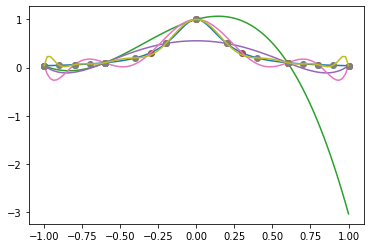

In [3]:

def generateGrid(n):
    n3 = math.floor( n/3)
    x_1 = np.linspace(-1, -0.6, n3)
    x_2 = np.linspace(-0.6, 0.6, n3 + 2)
    x_3 = np.linspace(0.6, 1, n3)
    concat = np.concatenate( (x_1,  np.concatenate( (x_2, x_3) ) )  )
    x2 = np.array(  [i for k, i in enumerate(concat) if i not in concat[:k]] )
    return x2

ns = [3, 6, 9, 15]

plt.plot(x_fine, rungeFun(x_fine))

for n in ns:
    x2 = generateGrid(n)
    y2 = rungeFun(x2)
    f2 = np.polyfit(x2, y2, n)
    poly2 = np.poly1d(f2)
    y2_new = poly2(x_fine)
    plt.plot(x2, y2, 'o', x_fine, y2_new, '-')


Now suppose we have nodes that are given by:

$$ x_j = \cos\left( \frac{2j -1}{2n} \pi \right), \;\;\; j = 1, ..., n. $$
    
For $n = 3, 6, 9, 15$ find the interpolating polynomial (using Python + your desired built in functions) and plot these interpolations.

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3251: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3251: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3251: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3251: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


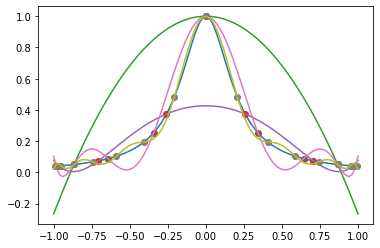

In [4]:
def cheby_nodes(x0, x1, n):
  return (x1 - x0) * (np.cos((2*np.arange(1, n + 1) - 1)/(2*n)*np.pi) + 1) / 2  + x0

ns = [3, 6, 9, 15]

plt.plot(x_fine, rungeFun(x_fine))

for n in ns:
    x3 = cheby_nodes(-1, 1, n)
    y3 = rungeFun(x3)
    f3 = np.polyfit(x3, y3, n)
    poly3 = np.poly1d(f3)
    y3_new = poly3(x_fine)
    plt.plot(x3, y3, 'o', x_fine, y3_new, '-')